In [331]:
import pandas as pd
import numpy as np

## 영화 평점 데이터

​

### 영화 평점 데이터를 활용하여 다음을 실시해보세요

​

1. 데이터 탐색 : NA가 있는지 탐색

​

2. 영화별 성별 평점 평균을 산출하여 성별로 상위/하위 10개 영화의 목록 추출 및 도식화 

​

3. 영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화

 - 인기도는 평점으로 평가

​

[데이터 설명]

​

- user data : ['user_id', 'gender', 'age', 'occupation', 'zip']

- ratings data : ['user_id', 'movie_id', 'rating', 'timestamp']

- movies data : ['movie_id', 'title', 'genres']

In [ ]:
# ratings data set => split and checking

In [157]:
#ratings = pd.read_csv('data/ratings.dat', header=None)
#ratings

,0
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
...,...
1000204,6040::1091::1::956716541
1000205,6040::1094::5::956704887
1000206,6040::562::5::956704746
1000207,6040::1096::4::956715648


In [158]:
#ratings.rename(columns={0:"data"}, inplace=True)

In [159]:
#ratings

,data
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
...,...
1000204,6040::1091::1::956716541
1000205,6040::1094::5::956704887
1000206,6040::562::5::956704746
1000207,6040::1096::4::956715648


In [160]:
#ratings['user_id'] = ratings.data.str.split('::').str[0]
#print(ratings)

                             data user_id
0           1::1193::5::978300760       1
1            1::661::3::978302109       1
2            1::914::3::978301968       1
3           1::3408::4::978300275       1
4           1::2355::5::978824291       1
...                           ...     ...
1000204  6040::1091::1::956716541    6040
1000205  6040::1094::5::956704887    6040
1000206   6040::562::5::956704746    6040
1000207  6040::1096::4::956715648    6040
1000208  6040::1097::4::956715569    6040

[1000209 rows x 2 columns]


In [161]:
#ratings['movie_id'] = ratings.data.str.split('::').str[1]
#print(ratings)

                             data user_id movie_id
0           1::1193::5::978300760       1     1193
1            1::661::3::978302109       1      661
2            1::914::3::978301968       1      914
3           1::3408::4::978300275       1     3408
4           1::2355::5::978824291       1     2355
...                           ...     ...      ...
1000204  6040::1091::1::956716541    6040     1091
1000205  6040::1094::5::956704887    6040     1094
1000206   6040::562::5::956704746    6040      562
1000207  6040::1096::4::956715648    6040     1096
1000208  6040::1097::4::956715569    6040     1097

[1000209 rows x 3 columns]


In [162]:
#ratings['rating'] = ratings.data.str.split('::').str[2]
#print(ratings)

                             data user_id movie_id rating
0           1::1193::5::978300760       1     1193      5
1            1::661::3::978302109       1      661      3
2            1::914::3::978301968       1      914      3
3           1::3408::4::978300275       1     3408      4
4           1::2355::5::978824291       1     2355      5
...                           ...     ...      ...    ...
1000204  6040::1091::1::956716541    6040     1091      1
1000205  6040::1094::5::956704887    6040     1094      5
1000206   6040::562::5::956704746    6040      562      5
1000207  6040::1096::4::956715648    6040     1096      4
1000208  6040::1097::4::956715569    6040     1097      4

[1000209 rows x 4 columns]


In [163]:
#ratings['timestamp'] = ratings.data.str.split('::').str[3]
#print(ratings)

                             data user_id movie_id rating  timestamp
0           1::1193::5::978300760       1     1193      5  978300760
1            1::661::3::978302109       1      661      3  978302109
2            1::914::3::978301968       1      914      3  978301968
3           1::3408::4::978300275       1     3408      4  978300275
4           1::2355::5::978824291       1     2355      5  978824291
...                           ...     ...      ...    ...        ...
1000204  6040::1091::1::956716541    6040     1091      1  956716541
1000205  6040::1094::5::956704887    6040     1094      5  956704887
1000206   6040::562::5::956704746    6040      562      5  956704746
1000207  6040::1096::4::956715648    6040     1096      4  956715648
1000208  6040::1097::4::956715569    6040     1097      4  956715569

[1000209 rows x 5 columns]


- 위 방식대로 하나하나 split을 이용하여 ::별로 나누는 것은 가능하지만, 
  많은 시간 소요 및 데이터 불러올 때 당시 에러 발생 ! 

- 따라서 , pd.read_csv()를 이용하여 한번에 sep="::"으로 나눈다.

In [311]:
ratings = pd.read_csv('data/ratings.dat', sep = "::", header=None, engine='python')

In [312]:
ratings.rename(columns={0:"user_id", 1:"movie_id", 2:"rating", 3:"timestamp"}, inplace=True)

In [313]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [314]:
users = pd.read_csv('data/users.dat', sep = "::", header=None, engine='python')

In [315]:
users

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [316]:
users.rename(columns={0:"user_id", 1:"gender", 2:"age", 3:"occupation", 4:"zip"}, inplace=True)

In [317]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [318]:
movies = pd.read_csv('data/movies.dat', sep = "::", header = None, engine='python')

In [319]:
movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [320]:
movies.rename(columns={0:"movie_id", 1:"title", 2:"genres"}, inplace=True)

In [321]:
movies.dtypes

movie_id     int64
title       object
genres      object
dtype: object

In [335]:
df_all3 = pd.merge(pd.merge(ratings, users), movies)

In [336]:
df_all3

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [338]:
df_all3.dtypes

user_id        int64
movie_id       int64
rating         int64
timestamp      int64
gender        object
age            int64
occupation     int64
zip           object
title         object
genres        object
dtype: object

In [ ]:
# 2

In [339]:
pdf1 = df_all3.pivot_table('rating', index='title', columns='gender', aggfunc=np.mean)

In [340]:
pdf1

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [341]:
# 어느 한쪽에 na가 있는 경우에도 삭제하기 위해서 dropna() 메서드의 파라미터
# how = 'any' 적용

In [342]:
pdf11 = pdf1.dropna(how='any')

In [343]:
pdf11

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
Your Friends and Neighbors (1998),2.888889,3.536585
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140


In [345]:
female_top10 = pdf11.sort_values('F',ascending=False)[:10]

In [346]:
female_top10

gender,F,M
title,,
Coldblooded (1995),5.0,3.588235
"Gate of Heavenly Peace, The (1995)",5.0,5.000000
"Other Side of Sunday, The (S�ndagsengler) (1996)",5.0,2.928571
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
"Big Combo, The (1955)",5.0,3.600000
Country Life (1994),5.0,2.000000
Lamerica (1994),5.0,4.666667
24 7: Twenty Four Seven (1997),5.0,3.750000
Raw Deal (1948),5.0,3.307692


NameError: name 'plt' is not defined

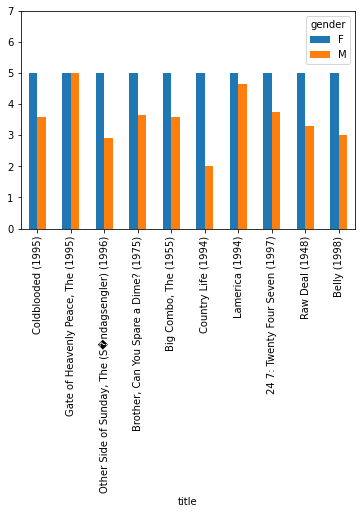

In [352]:
female_top10.plot.bar(stacked=False, ylim=(0,7))
plt.show()

In [349]:
female_down10 = pdf11.sort_values('F', ascending=False)[-10:]

In [350]:
female_down10

gender,F,M
title,,
"Sixth Man, The (1997)",1.0,2.647059
Spring Fever USA (a.k.a. Lauderdale) (1989),1.0,1.000000
Parasite (1982),1.0,2.500000
Power 98 (1995),1.0,2.200000
Big Bully (1996),1.0,2.000000
Meet Wally Sparks (1997),1.0,2.409091
"Enfer, L' (1994)",1.0,3.750000
Stalingrad (1993),1.0,3.593750
Carnosaur 3: Primal Species (1996),1.0,1.066667


NameError: name 'plt' is not defined

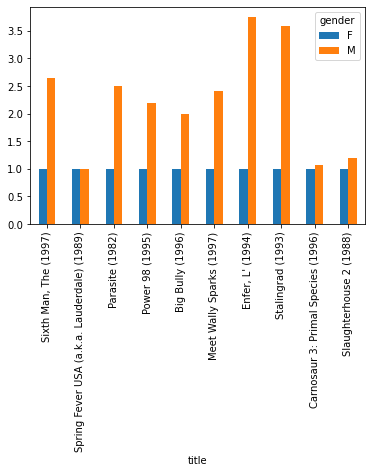

In [354]:
female_down10.plot.bar(stacked=False)
plt.show()

In [355]:
count_title_name = df_all3.groupby('title').size()

In [356]:
count_title_name[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [357]:
count_title = count_title_name.index[count_title_name >= 300]

In [358]:
count_title

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '20,000 Leagues Under the Sea (1954)',
       '2001: A Space Odyssey (1968)', '2010 (1984)', '28 Days (2000)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1058)

In [362]:
# groupby

In [364]:
mean_ratings1 = df_all3['rating'].groupby([df_all3['title'], df_all3['gender']])

In [365]:
mean_ratings11 = mean_ratings1.mean().unstack()

In [366]:
mean_ratings111 = mean_ratings11.dropna(how='any')

In [367]:
mean_ratings111

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
Your Friends and Neighbors (1998),2.888889,3.536585
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140


In [368]:
rating300 = mean_ratings111.loc[count_title]

In [369]:
rating300

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [393]:
rating_10 = rating300[:10]

In [394]:
rating_10

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738
2010 (1984),3.446809,3.413712


In [395]:
rating10 = rating_10.sort_values('F', ascending=False)

In [396]:
rating10

gender,F,M
title,,
12 Angry Men (1957),4.184397,4.328421
2001: A Space Odyssey (1968),3.825581,4.129738
101 Dalmatians (1961),3.791444,3.500000
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
10 Things I Hate About You (1999),3.646552,3.311966
2010 (1984),3.446809,3.413712
101 Dalmatians (1996),3.240000,2.911215
28 Days (2000),3.209424,2.977707
"13th Warrior, The (1999)",3.112000,3.168000


In [ ]:
# 영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화 확인

In [397]:
rating10['F']

title
12 Angry Men (1957)                    4.184397
2001: A Space Odyssey (1968)           3.825581
101 Dalmatians (1961)                  3.791444
20,000 Leagues Under the Sea (1954)    3.670103
10 Things I Hate About You (1999)      3.646552
2010 (1984)                            3.446809
101 Dalmatians (1996)                  3.240000
28 Days (2000)                         3.209424
13th Warrior, The (1999)               3.112000
'burbs, The (1989)                     2.793478
Name: F, dtype: float64